## LDSCI7227: Machine Learning 

#### AE1 - Classifiers

#### Student ID: 23220052

#### Enhancing Early Diabetes Prediction Using Machine Learning: An Ethical and Practical Approach

Before starting the assignment, we will be importing all libraries and packages required for our programme solution

- "import os" module to use the operating system dependent functionality allowing us to interact with file systems, manipulate paths and perform operating system-related tasks. (Python documentation, 2024)
- "import urllib" module to retrieve/fetch/workwith data from URLs (Python documentation, 2024)
- "import time" module to work with time-related functions (Python documentation, 2024)
- "import csv" module to work with Comma Separated Values files as well as read and write tabular data in CSV format (Python documentation, 2024)
- "import pandas as pd" library to manipulate and analyse data (W3 School, 2024)
- "import numpy as np" library to perform mathematical operations (W3 School, 2024)
- "import statistics" module to calculate mathematical statistics of numeric data (Python documentation, 2024)
- "import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn documentation, 2024)
- "import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib documentation, 2024)
- "import request" module to allow us to send HTTP requests (SitePoint, 2024)
- "import zipfile" module to create, read, write and list contents of ZIP archives/files (Real Python, 2023)
- "import re" module to provide regular expression matching operations(Re, 2024)
- "import pickle" module for serializing and deserializing Python objects (Python documentation, 2024)
- "from sklearn.feature_extraction.text import TfidfVectorizer" to convert a collection of raw documents to a matrix of TF-IDF features (scikit, 2024)
- "from sklearn.linear_model import LogisticRegression" to use Logistic Regression classifier (scikit, 2024)
- "from sklearn.model_selection import train_test_split" to split arrays or matrices into random train and test subsets (scikit, 2024)
- "from sklearn.naive_bayes import MultinomialNB" to use Naive Bayes classifier for multinomial models (scikit, 2024)
- "from sklearn.metrics import classification_report" to build a text report showing the main classification metrics (scikit, 2024)
- "from sklearn.feature_extraction.text import CountVectorizer" to convert a collection of text documents to a matrix of token counts (scikit, 2024)
- "from sklearn.metrics import accuracy_score" for accuracy classification score (scikit, 2024)

In [1]:
#We first import all libraries and packages 

import os 
import urllib
import time 
import csv
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns 
import matplotlib.pyplot as plt
import requests
import zipfile
import re
import pickle
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import GridSearchCV

In order to predict people with diabetes, we first have to download our dataset, in this case the diabetes_prediction_dataset dataset manually. Once done, we want to load our data from the Excel file.

In [2]:
#We first load our dataset from the CSV file
file_path = 'diabetes_prediction_dataset.csv'  

#Then, we read the CSV file
data = pd.read_csv(file_path)

#And display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(10))

First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158        

##### Code explanation: 

First, we load our dataset from the CSV file. To do that, we assign the name of our dataset 'diabetes_prediction_dataset.csv' to the variable 'file_path'. Then, we read our CSV file (file_path variable) by using the read_csv function from the pandas library and return it as a DataFrame that we assign to our 'data' variable. Finally, we display the first 10 rows of our DataFrame 'data' using the head method. 

Then, we thought it would be beneficial to generate a summary of our dataset to enhance our understanding. Indeed, this summary provides insights into the data distribution, central tendency, variability, and the types and structures of the data. Such insights allow us to grasp the overall behavior and spread of the dataset, helping us in the selection of appropriate analysis techniques and models. Additionally, this step allows us to identify outliers, assess the presence and extent of missing values for data cleaning and preprocessing, and detect any inconsistencies. 

In [3]:
#We generate a summary of our dataset
print("\nSummary of the dataset:")
print(data.info())

#As well as a descriptive statistics 
print("\nDescriptive statistics of the dataset:")
print(data.describe())

#Finally, we display the first few rows
data.head(10)


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Descriptive statistics of the dataset:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.3207

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


##### Code explanation: 

We first generate a summary of our dataset to understand the structure and completeness of our data. To do that, we use the info() method to provide a concise summary of the DataFrame, including information about the number of non-null entries in each column, the data type of each column, and the memory usage of the DataFrame. Then, we generate descriptive statistics to provide an overview of the central tendency, dispersion, and shape of the data distribution. To do that, we use the describe() method to generate descriptive statistics for the numerical columns of our DataFrame which include metrics such as count, mean, standard deviation, minimum, maximum, and the 25th, 50th (median), and 75th percentiles. Finally, we display the first 10 rows of our dataset. 


Now, we want to inspect our data for missing values and inconsistencies. To do that, we first examine the unique values in each columns to identify any inconsistencies.

In [4]:
#We first inspect the unique values in each column
print("\nUnique values in each column:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values[:10]}{'...' if len(unique_values) > 10 else ''}")


Unique values in each column:
gender: ['Female' 'Male' 'Other']
age: [80. 54. 28. 36. 76. 20. 44. 79. 42. 32.]...
hypertension: [0 1]
heart_disease: [1 0]
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi: [25.19 27.32 23.45 20.14 19.31 23.86 33.64 54.7  36.05 25.69]...
HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2]...
blood_glucose_level: [140  80 158 155  85 200 145 100 130 160]...
diabetes: [0 1]


##### Code explanation: 

The above code inspects and prints the unique values in each column of our DataFrame. To do that, it iterates through each column in our 'data' DataFrame, using the unique() method to  obtain an array of unique values present in that column. For clarity, it displays the first 10 unique values for each column and appends an ellipsis (...) if there are more than 10 unique values.

Then we want to check the presence of any missing values in the dataset.

In [5]:
#Then we check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


##### Code explanation: 

The above code identify and display the number of missing values in each column of our 'data' DataFrame. By using the isnull() method to create a boolean DataFrame where each element is True if the corresponding element in data is missing, and False otherwise. Then, it applies the sum() method across columns to count the number of missing values in each column.

We noticed that our 'data' DataFrame contains no missing values. However, it contains a mix of numerical and non-numerical data. To ensure consistent handling of our data, we plan to convert all non-numerical data into numerical equivalents. Therefore:

- 'Female' will be labeled as 1.
- 'Male' will be labeled as 2.
- 'Other' will be labeled as 0.
- 'Never' and 'Ever' will both be converted to 0.
- 'No Info' will be represented as NaN.
- 'Current' will be assigned the value 1.
- 'Former' and 'Not Current' will both be represented as 2.


In [6]:
#We first convert 'Female' to 1, 'Male' to 2 and 'Other' to 0
data['gender'] = data['gender'].replace({'Female': 1, 'Male': 2, 'Other': 0})


#Then, we convert 'never' and 'ever' to 0, 'current' to 1, 'former' and 'not current' to 2 and 'No Info' to NaN.
data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'ever': 0, 'current' : 1, 'former': 2, 'not current': 2, 'No Info': np.nan})


#Finally, we display our updated DataFrame
print(data)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           1  80.0             0              1              0.0  25.19   
1           1  54.0             0              0              NaN  27.32   
2           2  28.0             0              0              0.0  27.32   
3           1  36.0             0              0              1.0  23.45   
4           2  76.0             1              1              1.0  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       1  80.0             0              0              NaN  27.32   
99996       1   2.0             0              0              NaN  17.37   
99997       2  66.0             0              0              2.0  27.83   
99998       1  24.0             0              0              0.0  35.42   
99999       1  57.0             0              0              1.0  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

##### Code explanation: 

As mentioned previously, the code above converts values in the 'gender' column:
- 'Female' becomes 1,
- 'Male' becomes 2,
- 'Other' becomes 0.

Similarly, in the 'smoking_history' column:
- 'never' and 'ever' are both assigned 0,
- 'current' is assigned 1,
- 'former' and 'not current' are both assigned 2,
- 'No Info' is represented as NaN using np.nan.

We now want to ensure that all our columns are numerical. Therefore, we will check their data types. 

In [7]:
#We check our columns data types
print("Data types of columns:")
print(data.dtypes)

Data types of columns:
gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history        float64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


##### Code explanation: 

The above code uses the dtypes attribute of our 'data' DataFrame to return a Series containing the data type of each column. We notice that all our columns have numerical data (int64 and float64).

Now that our data is preprocessed and cleaned, we will split it into training (70%) and testing (25%) sets. The remaining 5% will be our deployment dataset, which we will use to run our model on unseen data to validate its predictions.

In [8]:
#We first define our target column
target_column = 'diabetes' 
X = data.drop(target_column, axis=1)
y = data[target_column]

#Then, we split our data into training (70%) and remaining (30%, testing + deployment)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=42)

#Then, we split the remaining 30% into 25% testing and 5% deployment
X_test, X_deploy, y_test, y_deploy = train_test_split(X_remaining, y_remaining, test_size=(5/30), random_state=42)

#Finally, we display the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_deploy: {X_deploy.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_deploy: {y_deploy.shape}")



Shapes of the datasets:
X_train: (70000, 8)
X_test: (25000, 8)
X_deploy: (5000, 8)
y_train: (70000,)
y_test: (25000,)
y_deploy: (5000,)


##### Code explanation: 

The above code aims to prepare our preprocessed and cleaned dataset into three distinct subsets: training, testing, and deployment datasets for Machine Learning tasks. It begins by defining the target variable, 'diabetes', which is what we aim to predict. The dataset is then split into features (X) obtained by dropping the 'diabetes' column from the original dataset (data) and the target (y) which retains only the 'diabetes' column. Using the train_test_split function, the data is initially divided into 70% for training (X_train and y_train) and 30% as remaining data (X_remaining and y_remaining).Then, the remaining 30% is then further split into approximately 25% for testing (X_test, y_test) and 5% for deployment (X_deploy, y_deploy). This is done to ensure that the training set is used to train the model, the testing set is used to evaluate the model's performance, and the deployment set is reserved for validating the model's predictions on unseen data. Finally, our code prints out the shapes of the resulting datasets to confirm the number of samples and features in each set, which is crucial for understanding the data distribution across training, testing and deployment phases of model development.

In [9]:
#We print the first few rows and size of our train_data (X_train and y_train)
train_data = pd.concat([X_train, y_train], axis=1)
print("Train Data:")
print("Size:", len(train_data))
print(train_data.head())

Train Data:
Size: 70000
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
76513       2  49.0             0              0              0.0  27.32   
60406       2  64.0             0              0              0.0  27.32   
27322       1  24.0             0              0              1.0  27.32   
53699       1  55.0             0              0              1.0  27.32   
65412       2  14.0             0              0              NaN  20.98   

       HbA1c_level  blood_glucose_level  diabetes  
76513          5.0                  155         0  
60406          3.5                  145         0  
27322          3.5                  130         0  
53699          6.5                  159         0  
65412          6.2                   85         0  


##### Code explanation: 

The above code is used to inspect our training data after splitting the dataset. Firtly, it combines the feature set (X_train) and the target set (y_train) into a single DataFrame called train_data using the pd.concat function along the columns axis (axis=1). This provides a complete view of the training data, including both the features and the target variable. Then it prints the size of the train_data DataFrame, indicating the number of samples it contains, followed by the first few rows of this combined DataFrame using the head() function. 

In [10]:
#Then, we print the first few rows and size of our test_data (X_test and y_test)
test_data = pd.concat([X_test, y_test], axis=1)
print("Test Data:")
print("Size:", len(test_data))
print(test_data.head())

Test Data:
Size: 25000
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
82923       2  69.0             0              1              0.0  43.57   
9242        1  28.0             0              0              1.0  16.34   
52911       2  19.0             0              0              NaN  24.41   
38094       2  36.0             0              0              2.0  28.31   
70633       2  49.0             0              0              1.0  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
82923          7.0                  240         1  
9242           4.5                  126         0  
52911          3.5                  145         0  
38094          5.0                  158         0  
70633          4.0                  100         0  


##### Code explanation: 

The above code is used to inspect our testing data after splitting the dataset. Firtly, it combines the feature set (X_test) and the target set (y_test) into a single DataFrame called test_data using the pd.concat function along the columns axis (axis=1). This provides a complete view of the testing data, including both the features and the target variable. Then it prints the size of the test_data DataFrame, indicating the number of samples it contains, followed by the first few rows of this combined DataFrame using the head() function. 

In [11]:
#Finally, we print the first few rows and size of our deploy_data (X_deploy and y_deploy)
deploy_data = pd.concat([X_deploy, y_deploy], axis=1)
print("Deploy Data:")
print("Size:", len(deploy_data))
print(deploy_data.head())

Deploy Data:
Size: 5000
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
81410       2   7.0             0              0              0.0  23.40   
71182       1  46.0             0              0              0.0  37.73   
44102       1  49.0             0              0              NaN  21.76   
69451       1  80.0             0              1              0.0  16.10   
78508       2  66.0             0              0              2.0  29.70   

       HbA1c_level  blood_glucose_level  diabetes  
81410          6.0                  126         0  
71182          5.7                  140         0  
44102          6.2                  126         0  
69451          5.8                  159         0  
78508          6.5                  200         0  


##### Code explanation:¶

The above code is used to inspect our deploy data after splitting the dataset. Firtly, it combines the feature set (X_deploy) and the target set (y_deploy) into a single DataFrame called deploy_data using the pd.concat function along the columns axis (axis=1). This provides a complete view of the deploy data, including both the features and the target variable. Then it prints the size of the deploy_data DataFrame, indicating the number of samples it contains, followed by the first few rows of this combined DataFrame using the head() function. Please note that our deployment dataset will be used at the end of the model training process.

Then, we thought it would be great to identify and visualize how many people have diabetes in our training and testing datasets. 

Training Data:
Number of positive cases (diabetes = 1): 5953
Number of negative cases (diabetes = 0): 64047


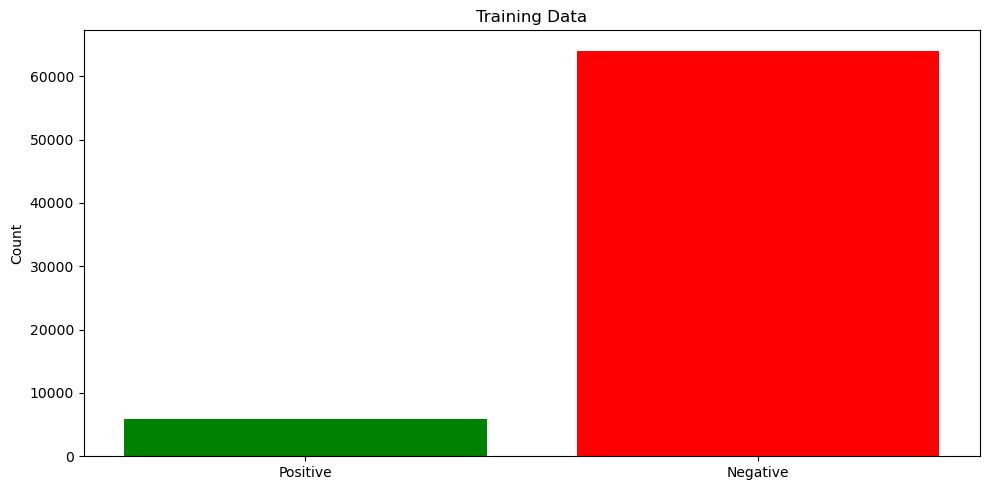

In [12]:
#We first count positive and negative cases in our training data
train_positive_count = (train_data['diabetes'] == 1).sum()
train_negative_count = (train_data['diabetes'] == 0).sum()

#Then, we print results for our training data
print("Training Data:")
print(f"Number of positive cases (diabetes = 1): {train_positive_count}")
print(f"Number of negative cases (diabetes = 0): {train_negative_count}")

#Finally, we plot bar graphs to visualize our training data distribution
fig, (ax) = plt.subplots(figsize=(10, 5))

ax.bar(['Positive', 'Negative'], [train_positive_count, train_negative_count], color=['green', 'red'])
ax.set_title('Training Data')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Code explanation: 

The above code counts and visualizes the distribution of positive and negative cases in the training data for diabetes. Initially, it calculates and prints the number of positive (diabetes = 1) and negative (diabetes = 0) cases in the train_data DataFrame using the sum() method. Then, it creates a bar plot to visualize the distribution of positive and negative cases. The plt.subplots function initializes a figure and an axe object with a specified size, and the ax.bar method is used to create a bar chart with 'Positive' and 'Negative' labels on the x-axis and their corresponding counts on the y-axis, using green for positive cases and red for negative cases. Finally, we generate a title 'Training Data' and label the y-axis 'Count'. Please note that the plt.tight_layout function adjusts the layout to prevent overlapping elements, while plt.show() displays the plot.


We now do the same for our testing dataset.


Testing Data:
Number of positive cases (diabetes = 1): 2085
Number of negative cases (diabetes = 0): 22915


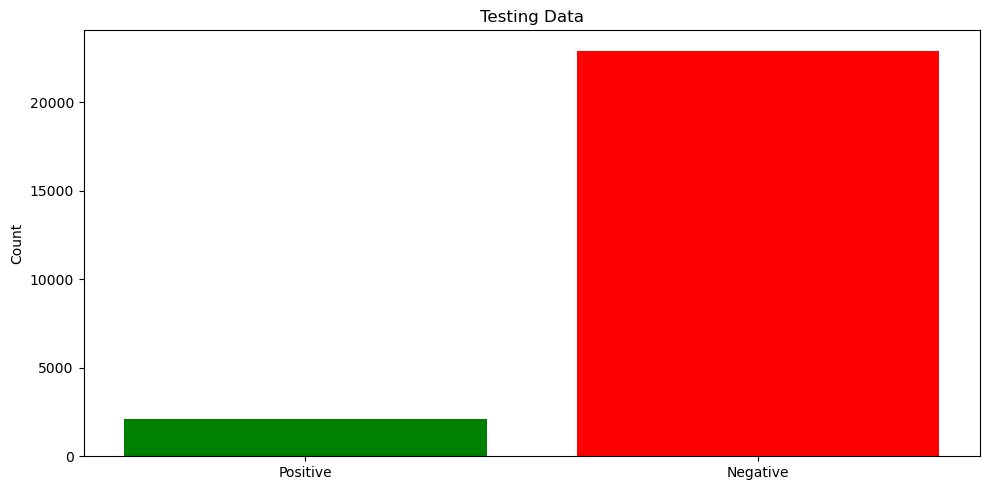

In [13]:
#We first count positive and negative cases in our testing data
test_positive_count = (test_data['diabetes'] == 1).sum()
test_negative_count = (test_data['diabetes'] == 0).sum()
                                                          
#Then, we print results for our testing data
print("\nTesting Data:")
print(f"Number of positive cases (diabetes = 1): {test_positive_count}")
print(f"Number of negative cases (diabetes = 0): {test_negative_count}")

#Finally, we plot bar graphs to visualize our testing data distribution
fig, (ax) = plt.subplots(figsize=(10, 5))

ax.bar(['Positive', 'Negative'], [test_positive_count, test_negative_count], color=['green', 'red'])
ax.set_title('Testing Data')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Code explanation: 

The above code counts and visualizes the distribution of positive and negative cases in the testing data for diabetes. Initially, it calculates and prints the number of positive (diabetes = 1) and negative (diabetes = 0) cases in the test_data DataFrame using the sum() method. Then, it creates a bar plot to visualize the distribution of positive and negative cases. The plt.subplots function initializes a figure and an axe object with a specified size, and the ax.bar method is used to create a bar chart with 'Positive' and 'Negative' labels on the x-axis and their corresponding counts on the y-axis, using green for positive cases and red for negative cases. Finally, we generate a title 'Testing Data' and label the y-axis 'Count'. Please note that the plt.tight_layout function adjusts the layout to prevent overlapping elements, while plt.show() displays the plot.


Following the above, we thought it would be great to check for any data imbalances. Indeed, this is crucial as it ensures that ML models perform well across all classes, avoiding bias towards the majority class and providing more accurate and reliable predictions. This is extremely important in applications like medical diagnosis, where the minority class holds significant importance. 

In [14]:
#We print the counts of positive and negative entries in the training dataset
print("Training Data:")
print("Positive Entries:", train_positive_count)
print("Negative Entries:", train_negative_count)

#And calculate and print the absolute difference between the counts of positive and negative entries in the training dataset
print("Difference:", abs(train_positive_count - train_negative_count))

#We do the same for the testing dataset
print("\nTest Data:")
print("Positive Entries:", test_positive_count)
print("Negative Entries:", test_negative_count)

print("Difference:", abs(test_positive_count - test_negative_count))


Training Data:
Positive Entries: 5953
Negative Entries: 64047
Difference: 58094

Test Data:
Positive Entries: 2085
Negative Entries: 22915
Difference: 20830


##### Code explanation: 

The above code calculate the counts of positive and negative entries in both the training and development datasets. It assumes that the datasets are already loaded and that the target column contains diabetes labels, with 0 representing no diabetes and 1 representing diabetes. Indeed, we first calculate the number of entries in the training dataset where the target column equals 1, stored in variable train_positive_count. It sums up all the True values resulting from the comparison. Then, we calculate the number of entries in the training dataset where the 'label' column equals 0, stored in train_negative_count variable. We then do the same for testing dataset, where the number of positive entries is stored in test_positive_count variable and the number of negative entries is stored in test_negative_count variables. We finally print the results, along with the absolute difference between the counts for both training and testing dataset.

Then, we generate a plot to visualize the characteristics of both our dataset before proceeding to our model training. 

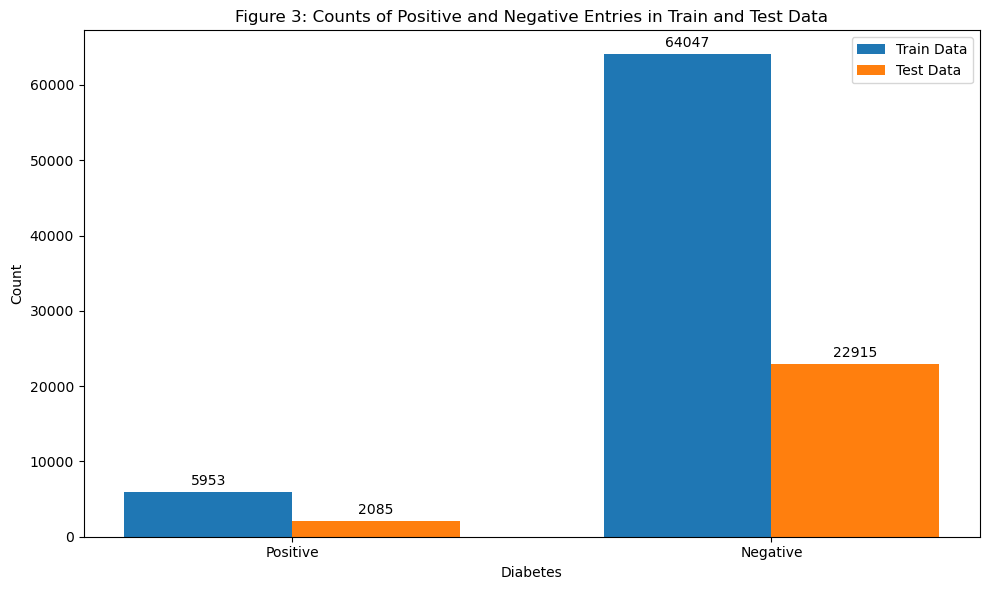

In [15]:
#We first define labels for the x-axis categories
train_labels = ['Positive', 'Negative']
test_labels = ['Positive', 'Negative']

#As well as the counts of positive and negative entries in the training and testing datasets
train_counts = [train_positive_count, train_negative_count]
test_counts = [test_positive_count, test_negative_count]

#We then create a figure and axis object for the plot with a specified size
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
#And generate an index range for positioning the bars on the x-axis
index = range(len(train_labels))

#We then plot bars representing counts of positive and negative entries in the training dataset
train_bars = ax.bar(index, train_counts, bar_width, label='Train Data')
#As well as plot bars representing counts of positive and negative entries in the testing dataset
test_bars = ax.bar([i + bar_width for i in index], test_counts, bar_width, label='Test Data')

#We set labels for the x-axis and y-axis
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
#We set the title of the plot
ax.set_title('Figure 3: Counts of Positive and Negative Entries in Train and Test Data')
#We set positions and labels for the ticks on the x-axis
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(train_labels)
#We display the legend indicating the bars representing the training and development datasets
ax.legend()

#We add counts above bars
for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        #We add text annotations above each bar to display its count
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

#Then adjust subplot parameters to prevent overlapping
plt.tight_layout()
#Finally we display the plot
plt.show()

##### Code explanation: 

The above code generates a bar plot to visualize the counts of positive and negative entries in both the training and testing datasets. To do that, we first give the code train_labels and test_labels lists that contain labels for the x-axis categories, which are 'Positive' and 'Negative' in this case. Then, we provide train_counts and test_counts lists that contain the counts of positive and negative entries in the training and test datasets, respectively. We then create a bar plot positioning the bars on the x-axis and plotting the bars representing the counts of positive and negative entries in the training and testing dataset. Finally, we set labels for the x-axis and y-axis, respectively as well as the title of the plot, and a legend indicating the bars representing the training and testing datasets. We also ask the code to iterate through the bars and adds text annotations above each bar to display its counts. Finally we adjust subplot parameters to prevent overlapping and display the plot.

Then, we check the distribution of labels in our train dataset then in our test dataset

In [16]:
#We calculate the distribution of unique labels in the target column of our training dataset,
#and normalize the counts to percentages
train_label_distribution = train_data['diabetes'].value_counts(normalize=True) * 100

#We do the same for our testing dataset
test_label_distribution = test_data['diabetes'].value_counts(normalize=True) * 100

#We then print a header indicating the label distribution in our training dataset
print("Train Label Distribution (Percentages):")
#Then we print the calculated label distribution in our training dataset
print(train_label_distribution)

#We finally do the same for our development dataset
print("\nTest Label Distribution (Percentages):")
print(test_label_distribution)

Train Label Distribution (Percentages):
diabetes
0    91.495714
1     8.504286
Name: proportion, dtype: float64

Test Label Distribution (Percentages):
diabetes
0    91.66
1     8.34
Name: proportion, dtype: float64


##### Code explanation:

Our above code aims to analyze the distribution of labels within our training and testing dataset (train_data and test_data, respectively). To do that, we ask the code to calculate the distribution of unique labels in the 'diabetes' column of our training dataset (train_data). By setting normalize=True, the resulting counts are converted into percentages, representing the proportion of each label relative to the total number of instances in the dataset. We then do the same for our testing dataset (test_data). We then ask the code to print a header indicating the output that represtns the label distribution in the training and testing dataset, as well as the calculated label distribution in the dataset respectively. Each unique label is displayed along with its corresponding percentage of occurrences. The "\n" is a newline character, ensuring that there is a blank line between the previous and following outputs.

Then we create a figure with two subplots, each displaying a bar chart of the label distribution for the training and test datasets, respectively, providing a visual comparison of the label proportions between the two datasets.

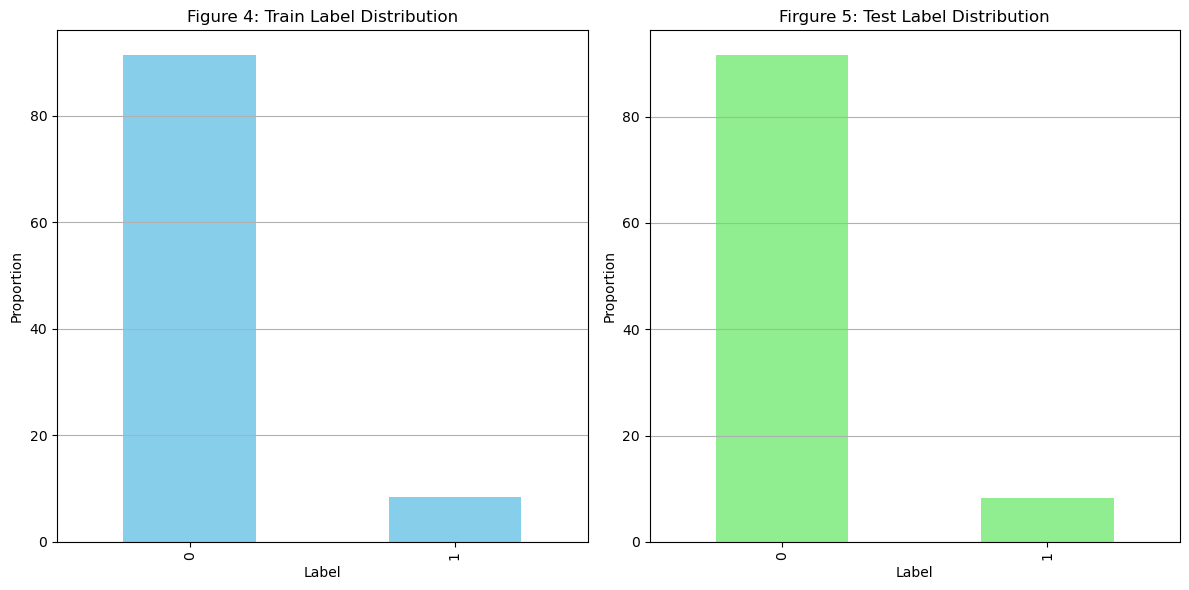

In [17]:
#We create a figure and subplots layout with 1 row and 2 columns, and specify the figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#We plot the label distribution for the training dataset on the first subplot
train_label_distribution.plot(kind='bar', ax=ax[0], color='skyblue')
#We then set title, x-axis label, y-axis label, and grid for the first subplot
ax[0].set_title('Figure 4: Train Label Distribution')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Proportion')
ax[0].grid(axis='y')

#Secondly, we plot the label distribution for the testing dataset on the second subplot
test_label_distribution.plot(kind='bar', ax=ax[1], color='lightgreen')
#We then set title, x-axis label, y-axis label, and grid for the second subplot
ax[1].set_title('Firgure 5: Test Label Distribution')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Proportion')
ax[1].grid(axis='y')

#Finally, we adjust subplot spacing to prevent overlap
plt.tight_layout()
#And display the plot
plt.show()

##### Code explanation:

In the above code, we aim to visualize the distributions of label proportions for both the training and testing datasets. We ask the code to provide us with a bar chart of the label distribution for the training dataset on the first subplot (ax[0]), we set a title to it, as well as the label for the x-axis and y-axis of the first subplot. With the "ax[0].grid(axis='y')", we ask the code to add gridlines along the y-axis of the first subplot to aid visualization. Then, we do the same for our testing dataset, defined as the second subplot (ax[1]). We finally adjust the spacing between subplots to prevent overlap and display the entire figure containing both subplots.

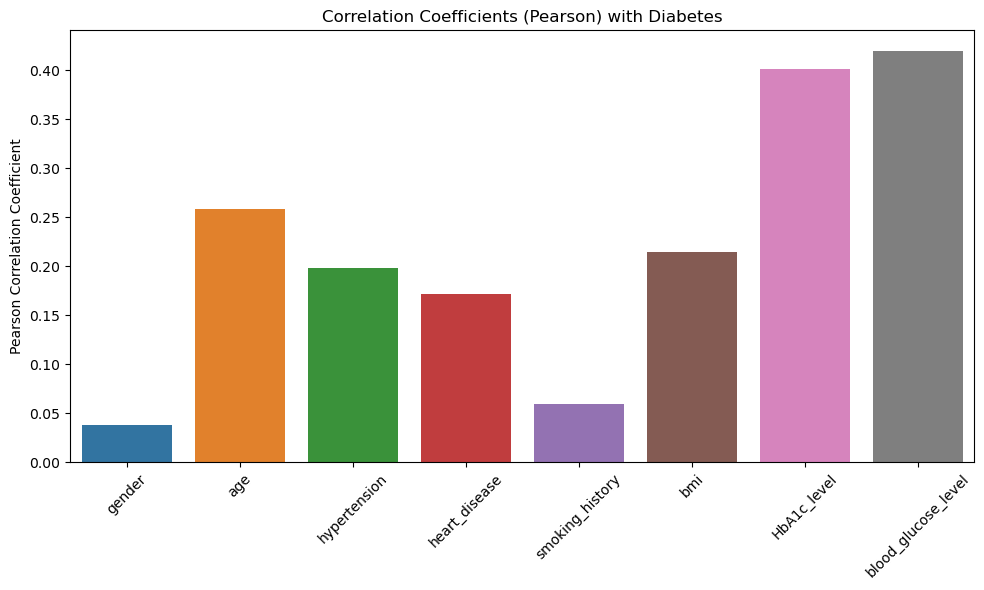

In [18]:
#We assume that 'diabetes' is the target variable and the rest are features
features = data.drop('diabetes', axis=1)
target = data['diabetes']

#We calculate Pearson correlation coefficients for numerical features
numeric_features = features.select_dtypes(include=['int64', 'float64'])
correlations = numeric_features.apply(lambda x: x.corr(target))

#Finally, we plot these correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation Coefficients (Pearson) with Diabetes')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above code performs an analysis to understand the correlation between numerical features and the 'diabetes' target variable in our dataset. Initially, it assumes 'diabetes' is the target variable and selects all other columns as features. It separates the features from the target variable by dropping the 'diabetes' column from the original dataset and assigning it to the variable 'features'. The target variable itself is assigned to 'target'. Next, it identifies the numerical features within the 'features' DataFrame using .select_dtypes(include=['int64', 'float64']), ensuring only columns containing numeric data types are considered. It then calculates Pearson correlation coefficients between each numerical feature and the 'diabetes' target variable using .apply(lambda x: x.corr(target)). Pearson correlation coefficient measures the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation. Finally, the code visualizes these correlations using Seaborn's barplot(), where each feature's correlation coefficient with 'diabetes' is plotted as a bar. 

--> Please note that since we assigned numerical values (0 and 1) to the gender and smoking history features, which were originally categorical, the correlation analysis for these features is not accurate. However, the analysis reveals significant correlations between diabetes and other variables such as blood glucose level, HbA1c level, age, and BMI, suggesting potential predictive relationships, indicating that these latter may be associated with a higher likelihood of diabetes.

Now, we need to select a machine learning model for our task. Based on our literature review, we will focus on Logistic Regression, Decision Trees, Random Forest, and Naive Bayes. We thought it would be interesting to compare the accuracy of these classifiers to determine which one is the most suitable for our model training.

In [19]:
#We first define preprocessing steps with SimpleImputer for missing values and StandardScaler for scaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Then, we initialize classifiers 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

#And create a pipeline with preprocessing and each classifier
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

#Finally, we evaluate models using cross-validation
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Cross-validation scores: {scores}")
    print(f"  Mean accuracy: {np.mean(scores):.4f}")
    print("")



Logistic Regression:
  Cross-validation scores: [0.96035714 0.96157143 0.9625     0.95907143 0.96035714]
  Mean accuracy: 0.9608

Decision Trees:
  Cross-validation scores: [0.952      0.95092857 0.95435714 0.94828571 0.95171429]
  Mean accuracy: 0.9515

Random Forest:
  Cross-validation scores: [0.96971429 0.97021429 0.97164286 0.969      0.97064286]
  Mean accuracy: 0.9702



##### Code explanation: 

The above code evaluates multiple classifiers using cross-validation to compare their performance. Firstly, assuming that X_train and y_train are already defined, it sets up a preprocessing pipeline (preprocessor), which consists of two steps: SimpleImputer with strategy 'mean' to handle missing values by imputing the mean of the feature and StandardScaler to standardize features by removing the mean and scaling to unit variance. Then, it initializes a dictionary of classifiers (Logistic Regression, Decision Trees, Random Forest, and Naive Bayes), where each classifier is instantiated with specific parameters (max_iter for LogisticRegression and random_state for all classifiers) to ensure consistent behavior across runs. Subsequently, it creates another dictionary where each key-value pair represents a pipeline combining the preprocessor and a classifier from the models dictionary. This ensures that preprocessing steps are consistently applied before fitting the model. Finally, it evaluates each pipeline using 5-fold cross-validation (cv=5), meaning that for each pipeline, it computes the accuracy scores (scoring='accuracy') and prints out the results, including individual cross-validation scores and the mean accuracy across folds. 

--> Based on our evaluation, the Random Forest model stands out as the top performer, achieving a mean accuracy of 0.9702. As a result, we have decided to proceed with training our model using Random Forest.

--> For our current analysis, we have decided not to incorporate clustering. Our focus is on supervised learning tasks where we already possess labeled data. Our primary objective is predictive modeling rather than exploratory data analysis. In supervised learning, we can directly apply algorithms that predict the target variable using the available labeled data. Clustering becomes more relevant when the goal is to uncover hidden structures within unlabeled data. While clustering could be beneficial for tasks like understanding data structure, we have earmarked it for potential future use, particularly in more exploratory analyses (AE2), where uncovering underlying patterns or enhancing predictive models through feature engineering could provide additional insights.

Now we want to train our Random Forest model on our training data. 

In [20]:
#We first define preprocessing steps with SimpleImputer for missing values and StandardScaler for scaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  #It replaces NaN with mean of the column
    ('scaler', StandardScaler())  #It standardizes features by removing mean and scaling to unit variance
])

#Then, we initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

#And create a pipeline with preprocessing and the classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

#We then train it on our training data
model.fit(X_train, y_train)

#And evaluate our model on the training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 99.92%


##### Code explanation: 

The above code trains a Random Forest classifier on our training data. Firstly, it creates a preprocessing pipeline 'preprocessor' that is defined by using SimpleImputer to handle missing values by replacing NaNs with the mean of each column, and a StandardScaler to standardize the features, which removes the mean and scales them to unit variance, making the data more suitable for modeling. Then, the Random Forest classifier is initialized with random_state=42 for reproducibility. This classifier is then incorporated into a comprehensive pipeline 'model' that sequentially applies the defined preprocessing steps 'preprocessor' and then fits the classifier 'random_forest' to the training data (X_train, y_train). After training the model using model.fit(X_train, y_train), the code evaluates its performance on the training set by computing the training accuracy 'train_accuracy' using model.score(X_train, y_train). This accuracy metric reflects how well the model predicts the training data labels compared to their actual values. Finally, it displays the accuracy score rounded to four decimal places, providing insight into the model's effectiveness in learning from the training data.

Now, we want to evaluate our model performance to assess how well it performs on unseen data. To do that, we will use our testing data. 

In [21]:
#We evaluate model performance on testing data
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%") 

Testing Accuracy: 96.99%


##### Code explanation: 
    
The above code evaluates the performance of our Random Forest model 'model' on unseen testing data (X_test, y_test). The model.score(X_test, y_test) function calculates the accuracy of the model predictions by comparing them to the true labels (y_test) from the testing dataset (X_test). Finally, we print the accuracy score rounded to four decimal places, providing a clear indication of how well the model generalizes to new, unseen data.

--> Please, note that the accuracy score reflects the proportion of correctly predicted outcomes out of all predictions made on the testing data. It measures how accurately the model predicts the target variable (y_test) based on the features (X_test) it hasn't seen during training. A higher testing accuracy suggests that the model performs well and makes accurate predictions on new instances, which is a key metric in assessing the model's overall performance and reliability.

Now, we want to generate a classification report to evaluate the performance of our classification model. It provides detailed metrics such as precision, recall, F1-score, and support for each class, offering insights into how well the model predicts each category. 

In [22]:
#We first assume that our X_test, y_test are your testing data
y_pred = model.predict(X_test)

#Then, we generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22915
           1       0.94      0.68      0.79      2085

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



##### Code explanation: 

The above code aims to evaluate our model on a separate set of testing data, X_test and y_test. Firstly, it uses the trained model to predict the class labels for the instances in X_test, producing y_pred as the predicted labels. Then, the classification_report function is used to generate a comprehensive report on the model's performance, including key metrics such as precision, recall, F1-score, and support for each class present in y_test. Finally, it displays the "Classification Report," providing a detailed assessment of how well the model predicts each class. 

Now we want to fine-tune the hyperparameters of our Random Forest model to optimize its performance. 

In [23]:
#We first define the parameter grid for GridSearchCV
param_grid = {
     'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5]
}

#Then, we initialize GridSearchCV with the defined parameter grid and 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

#We then, fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

#Finally, we print the best parameters found by GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)


Best Parameters:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


##### Code explanation: 

The above code searches for the optimal hyperparameters for our model. Firstly, the parameter grid (param_grid) is defined, specifying different combinations of hyperparameters for our Random Forest classifier. Please note that the grid includes variations for n_estimators, max_depth, and min_samples_split. Then, the GridSearchCV is initialized with our model pipeline, the parameter grid (param_grid), 5-fold cross-validation (cv=5), and the scoring metric (scoring='accuracy'). In other words, the fit method is called on GridSearchCV to train and evaluate all combinations of parameters using the training data (X_train, y_train). Finally, the best performing combination of parameters is printed using grid_search.best_params_.

Now, we re-evaluate our model using the optimized hyperparameters from the best model.

In [24]:
#We then evaluate the best model found by GridSearchCV on the testing data
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print(f"Testing Accuracy with Best Model: {test_accuracy * 100:.2f}%") 

#And display the best parameters used by the model
print(f"Best Parameters Used: {grid_search.best_params_}")

#We then evaluate the model with best parameters on testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#And finally generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Testing Accuracy with Best Model: 97.22%
Best Parameters Used: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22915
           1       1.00      0.67      0.80      2085

    accuracy                           0.97     25000
   macro avg       0.99      0.83      0.89     25000
weighted avg       0.97      0.97      0.97     25000



##### Code explanation: 

The above code first evaluates the best model found by GridSearchCV on the testing data by calculating its accuracy and printing it. It then displays the parameters used by this best model. Subsequently, our model with its best parameters is used to make predictions on the testing data (X_test). Finally, the code generates a classification report based on these predictions and prints it, providing detailed performance metrics such as precision, recall, and F1 score for each class

Then, we decided to do a cross-validation step as it is crucial for the model evaluation process because it provides a robust estimate of the model's performance on unseen data. Indeed, cross-validation helps mitigate the risk of overfitting and ensures that the model generalizes well to new data. 

In [25]:
#We use 5-fold cross-validation and accuracy as the scoring metric
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

#And print the cross-validation scores and the mean accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy: {:.4f}".format(cv_scores.mean())) 

Cross-Validation Scores: [0.96971429 0.97021429 0.97164286 0.969      0.97064286]
Mean Cross-Validation Accuracy: 0.9702


##### Code explanation: 

The above code evaluates our model's performance. To do that, it splits our dataset (X_train, y_train) into 5 folds. Our model is trained on 4 folds and validated on the remaining fold iteratively, ensuring that each fold serves as both training and validation data across different iterations. The 'accuracy' scoring metric is used to assess how well the model predicts the target variable. After computing the accuracy scores for each fold, the code prints both the individual cross-validation scores and the mean accuracy across all folds. 

Now, we will save our best model so that it can be loaded and reused for predictions on new data, without retrain the model from scratch.

In [26]:
#We save our best model to a file
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved to 'best_model.pkl'")

Best model saved to 'best_model.pkl'


##### Code explanation: 

The above code saves our trained machine learning model using the joblib library in Python. To do that it employs joblib.dump() to serialize the model and store it in a file named 'best_model.pkl'. This is crucial for easy retrieval and reuse without needing to retrain from scratch. Finally, it prints a message that confirms that the model has been successfully saved to the specified file location.

Subsequently, we want to analyze the feature importance to understand which features have the most significant impact on our model's predictions.

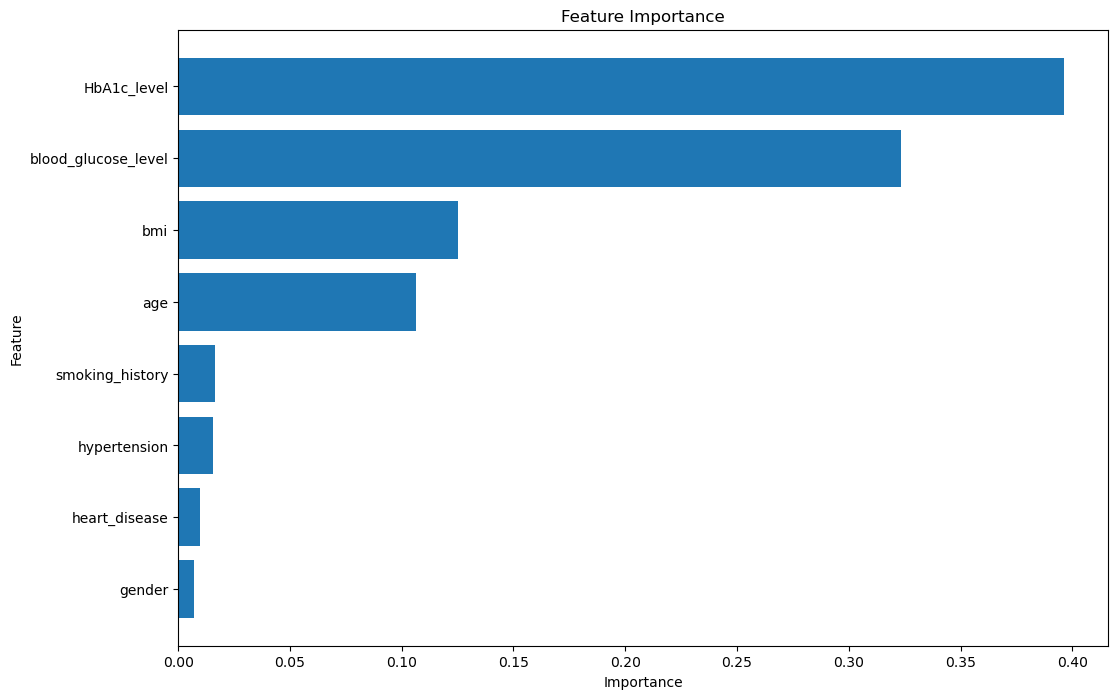

In [27]:
#We first extract the trained Random Forest classifier from the pipeline
trained_rf = model.named_steps['classifier']

#And get feature importances
feature_importances = trained_rf.feature_importances_

#We assume that feature names are available
feature_names = X_train.columns  

#And create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#To finally plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

##### Code explanation: 

This above code illustrates feature importances from our trained Random Forest classifier. Initially, the Random Forest model (trained_rf) is extracted from the pipeline using the named_steps attribute. Feature importances are then computed using the feature_importances_ property of our Random Forest model, assuming that the feature names are available in X_train.columns. These feature names and their corresponding importances are organized into a DataFrame (importance_df), sorted in descending order based on importance values. Finally, the code creates a horizontal bar plot to visualize the relative importance of each feature. This helps us interpret which features have the most significant impact on the model's predictions. 

Finally, we deploy our model on a new unseen deployment data (5%, X_deploy, y_deploy) to assess how well our model performs on completely new and independent data that it hasn't seen during training or evaluation. This is crucial because it provides insights into the model's ability to generalize to real-world scenarios and validate its robustness and reliability before it is used for making critical decisions. 

In [28]:
#We assume that X_deploy is our deployment data and y_deploy is the actual given diabetes scores

#We first make predictions using the loaded model
y_pred_deploy = best_model.predict(X_deploy)

#And create a DataFrame with X_deploy, y_deploy, and the predicted values
deploy_results = pd.DataFrame(X_deploy, columns=X_deploy.columns)
deploy_results['Actual_Diabetes'] = y_deploy 
deploy_results['Predicted_Diabetes'] = y_pred_deploy

#Then, we save the results to a file with predicted values included
deploy_results.to_csv('deployment_results_with_predictions.csv', index=False)

#And finally, we display the deployment results
print("Deployment results with predictions saved to 'deployment_results_with_predictions.csv'")


Deployment results with predictions saved to 'deployment_results_with_predictions.csv'


##### Code explanation: 

The above code demonstrates the deployment of our best_model on our deployment data (X_deploy) to predict diabetes outcomes. Initially, predictions are made using the model, generating y_pred_deploy. Subsequently, a DataFrame deploy_results is created, incorporating X_deploy, actual diabetes scores (y_deploy), and predicted diabetes values. The results are then saved to a CSV file named 'deployment_results_with_predictions.csv', ensuring the inclusion of predicted values. Finally, the code displays a statement that confirms the successful saving of our deployment results with predictions.

We finally calculate the accuracy score of our model on our deployment dataset to validate and maintain the efficacy of our machine learning model in real-world applications. 

In [29]:
#We calculate our model accuracy score on deployment data
accuracy = accuracy_score(y_deploy, y_pred_deploy)

#And print the result
print(f"Accuracy on Deployment Data: {accuracy * 100:.2f}%")


Accuracy on Deployment Data: 96.88%


##### Code explanation: 

The above code aims to calculate the accuracy score of our machine learning model on our deployment data. To do that, it uses the accuracy_score function to compare the predicted values (y_pred_deploy) with the actual target values (y_deploy). It assesses the proportion of correctly predicted outcomes out of the total number of predictions made. Finally, the result in printed, providing a measure of how well the model performs on the unseen deployment dataset.

#### References: 

1. GfG (2022) Using countvectorizer to extracting features from text, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/ (Accessed: 12 April 2024).

2. GfG (2023) Advantages and disadvantages of logistic regression, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/ (Accessed: 12 April 2024).

3. Matplotlib documentation (2024) Pyplot tutorial. Available at: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html (Accessed: 29 February 2024).


4. Pandas documentation (2024) Pandas.dataframe.replace#. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html (Accessed: 29 February 2024).


5. Python documentation (2024) CSV - csv file reading and writing . Available at: https://docs.python.org/3/library/csv.html (Accessed: 29 February 2024).

6. Python documentation (2024) How to fetch internet resources using the urllib package. Available at: https://docs.python.org/3/howto/urllib2.html (Accessed: 29 February 2024).

7. Python documentation (2024) OS - miscellaneous operating system interfaces . Available at: https://docs.python.org/3/library/os.html (Accessed: 29 February 2024).

8. Python documentation (2024) Pickle - python object serialization. Available at: https://docs.python.org/3/library/pickle.html (Accessed: 12 April 2024).

9. Python documentation (2024) Statistics - mathematical statistics functions. Available at: https://docs.python.org/3/library/statistics.html (Accessed: 29 February 2024).

10. Python documentation (2024) Time - Time Access and conversions. Available at: https://docs.python.org/3/library/time.html (Accessed: 29 February 2024).


11. Real Python (2023) Python’s zipfile: Manipulate your zip files efficiently, Real Python. Available at: https://realpython.com/python-zipfile/ (Accessed: 12 April 2024).

12. RE (2024) - regular expression operations (no date) Python documentation. Available at: https://docs.python.org/3/library/re.html (Accessed: 12 April 2024).

13. scikit (2024) Sklearn.feature_extraction.text.CountVectorizer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html (Accessed: 12 April 2024).

14. scikit (2024) Sklearn.feature_extraction.text.TfidfVectorizer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html (Accessed: 12 April 2024).

15. scikit (2024) Sklearn.linear_model.logisticregression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 12 April 2024).

16. scikit (2024) Sklearn.metrics.accuracy_score. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html (Accessed: 12 April 2024).

17. scikit (2024) Sklearn.metrics.classification_report. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Accessed: 12 April 2024).

18. scikit (2024) Sklearn.model_selection.train_test_split. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (Accessed: 12 April 2024).

19. scikit (2024) Sklearn.naive_bayes.multinomialnb. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html (Accessed: 12 April 2024).

20. scikit (2024) 1.1. Linear Models. Available at: https://scikit-learn.org/stable/modules/linear_model.html (Accessed: 12 April 2024).

21. Seaborn documentation (2024) An introduction to seaborn. Available at: https://seaborn.pydata.org/tutorial/introduction.html (Accessed: 29 February 2024).

22. SitePoint (2024) Making HTTP requests in Node.js. Available at: https://www.sitepoint.com/making-http-requests-in-node-js/ (Accessed: 12 April 2024).

23. TensorFlow (no date) Classification on imbalanced data : Tensorflow Core. Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data (Accessed: 12 April 2024).

24. W3 School (2024) Pandas Getting Started. Available at: https://www.w3schools.com/python/pandas/pandas_getting_started.asp (Accessed: 29 February 2024).

25. W3 School (2024) NumPy getting started. Available at: https://www.w3schools.com/python/numpy/numpy_getting_started.asp (Accessed: 29 February 2024).
